# Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale

# Loading the Dataset

In [11]:
df = pd.read_csv("abalone.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Univariate analysis

In [13]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
df[['Length','Rings']].describe()

,Length,Rings
count,4177.000000,4177.000000
mean,0.523992,9.933684
std,0.120093,3.224169
min,0.075000,1.000000
25%,0.450000,8.000000
50%,0.545000,9.000000
75%,0.615000,11.000000
max,0.815000,29.000000


<AxesSubplot:ylabel='Frequency'>

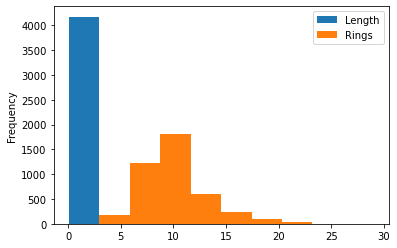

In [15]:
df[['Length','Rings']].plot(kind="hist")

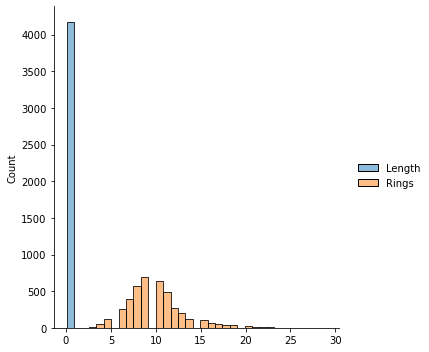

In [16]:
sns.displot(df[['Length','Rings']])

# `Bivariate analysis

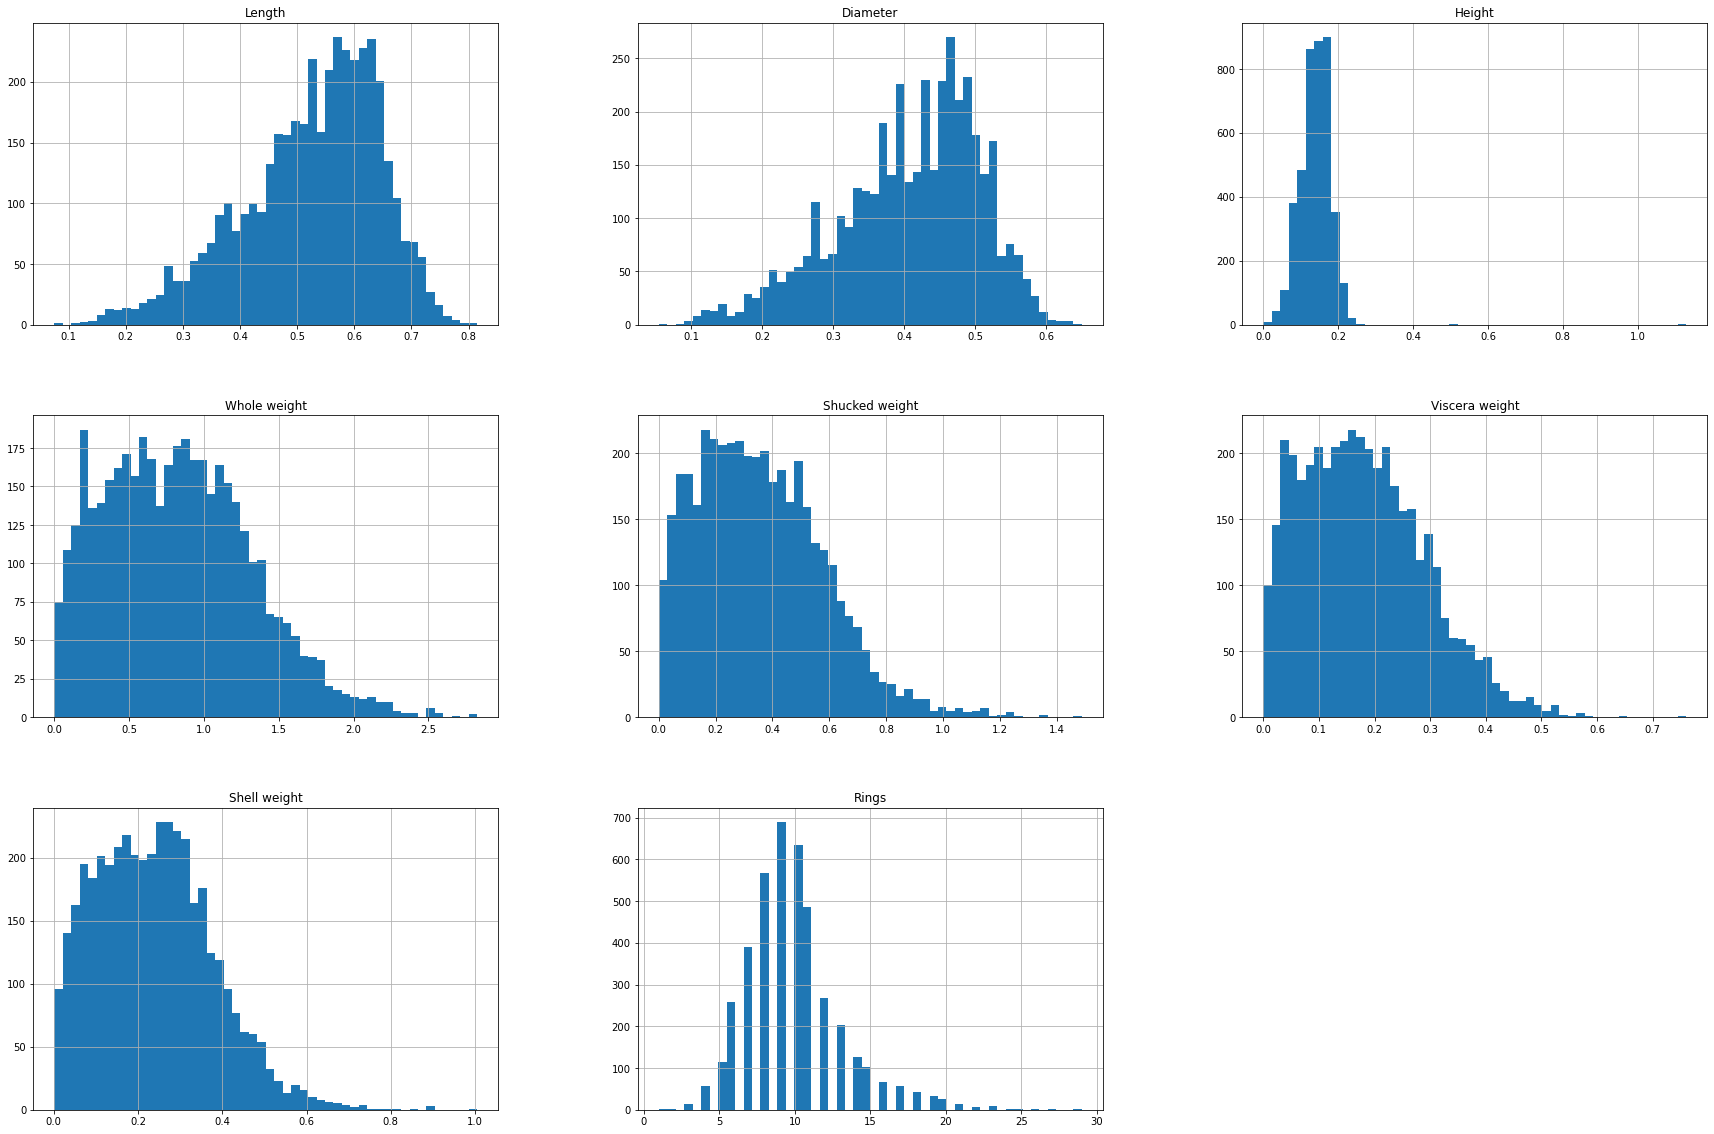

In [17]:
df.hist(bins=50,figsize=(30,20));

<AxesSubplot:xlabel='Length', ylabel='Rings'>

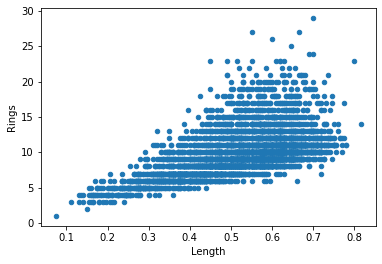

In [9]:
df.plot.scatter(x='Length',y='Rings')

<BarContainer object of 4177 artists>

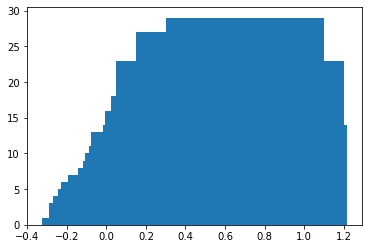

In [18]:
plt.bar(df.Length,df.Rings)

# Multivariate analysis

<AxesSubplot:>

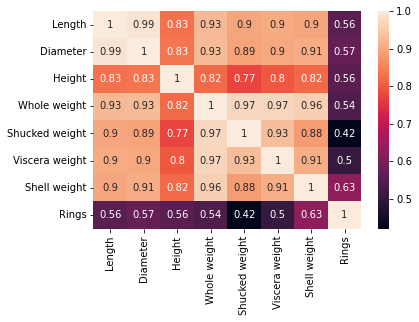

In [19]:
sns.heatmap(df.corr(),annot=True)

# Descriptive Statistics 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [21]:
df[['Length','Rings']].mean()

Length    0.523992
Rings     9.933684
dtype: float64

In [22]:
df[['Length','Rings']].median()

Length    0.545
Rings     9.000
dtype: float64

In [23]:
df[['Length','Rings']].std()

Length    0.120093
Rings     3.224169
dtype: float64

# Handle the Missing values

In [24]:
df.shape

(4177, 9)

In [25]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Find Outliers and Replacing

<AxesSubplot:xlabel='Length'>

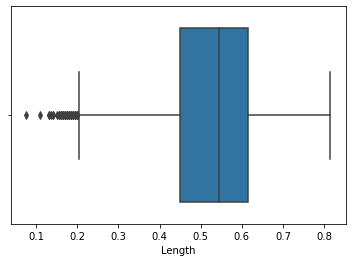

In [26]:
sns.boxplot(x=df["Length"])

In [27]:
q2 = df.Length.quantile(0.25)
q3 = df.Length.quantile(0.75)
IQR = q3 - q2
upper_limit = q3+1.5*IQR
lower_limit = q2-1.5*IQR

In [28]:
print(lower_limit)
print(upper_limit)
df["Length"].head

0.20250000000000004
0.8624999999999999


<bound method NDFrame.head of 0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64>

In [29]:
df["Length"] = np.where(df["Length"]<lower_limit,6.52,df["Length"])

<AxesSubplot:xlabel='Length'>

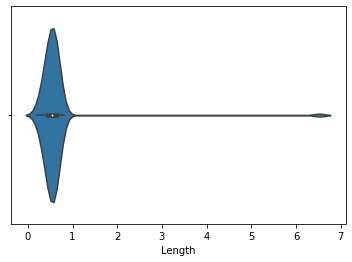

In [30]:
df["Length"] = np.where(df["Length"]<lower_limit,6.52,df["Length"])
sns.violinplot(x=df["Length"])

<AxesSubplot:xlabel='Rings'>

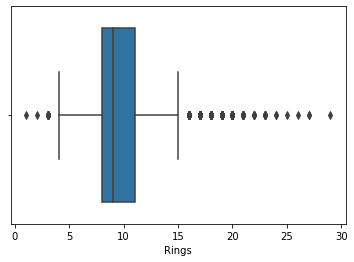

In [31]:
sns.boxplot(x=df["Rings"])

In [32]:
def find_outliers(df):
    q4=df.quantile(0.25)
    q5=df.quantile(0.75)
    IQR=q4-q5
    outliers=df[((df<(q4-1.5*IQR))|(df>(q5+1.5*IQR)))]
    return outliers

In [33]:
outliers=find_outliers(df["Rings"])
print("number of outliers:"+str(len(outliers)))
print("max outlier value:"+str(outliers.max()))
print("min outlier value:"+str(outliers.min()))
outliers

number of outliers:4177
max outlier value:29
min outlier value:1


0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [34]:
df["Rings"] = np.where(df["Rings"]<lower_limit,6.52,df["Rings"])

<AxesSubplot:xlabel='Rings'>

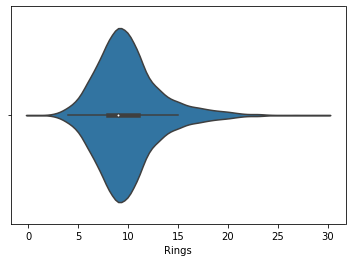

In [35]:
df["Rings"] = np.where(df["Rings"]<lower_limit,6.52,df["Rings"])
sns.violinplot(x=df["Rings"])

# check for Categorical columns and perform encoding

In [36]:
df_1=df.copy()
labelencoder=LabelEncoder()
df_1['Length']=labelencoder.fit_transform(df_1['Rings'])
df_1[['Length','Rings']]

,Length,Rings
0,14,15.0
1,6,7.0
2,8,9.0
3,9,10.0
4,6,7.0
...,...,...
4172,10,11.0
4173,9,10.0
4174,8,9.0
4175,9,10.0


# Split the datainto dependent and independent variables# 

In [37]:
y = df["Length"]
y

0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64

In [38]:
X = df.drop("Length",axis=1)
X

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...
4172,F,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,M,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,M,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,F,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


# Scale the independent variables

In [39]:
scale=df.iloc[:,1:4].values
print("\n Original values:\n\n",scale)


 Original values:

 [[0.455 0.365 0.095]
 [0.35  0.265 0.09 ]
 [0.53  0.42  0.135]
 ...
 [0.6   0.475 0.205]
 [0.625 0.485 0.15 ]
 [0.71  0.555 0.195]]


In [40]:
from sklearn import preprocessing
min_max_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
new_scale=min_max_scale.fit_transform(scale)
print("'\n Values After minmax scaling \n\n'",new_scale)

'
 Values After minmax scaling 

' [[0.03958828 0.5210084  0.0840708 ]
 [0.0229612  0.35294118 0.07964602]
 [0.05146477 0.61344538 0.11946903]
 ...
 [0.06254949 0.70588235 0.18141593]
 [0.06650831 0.72268908 0.13274336]
 [0.07996833 0.84033613 0.17256637]]


In [41]:
Standardisation=preprocessing.StandardScaler()
new_scale=Standardisation.fit_transform(scale)
print("\n\n values after std : \n\n",new_scale)



 values after std : 

 [[-0.21902834 -0.43214879 -1.06442415]
 [-0.37931156 -1.439929   -1.18397831]
 [-0.10454032  0.12213032 -0.10799087]
 ...
 [ 0.00231516  0.67640943  1.56576738]
 [ 0.04047783  0.77718745  0.25067161]
 [ 0.17023092  1.48263359  1.32665906]]


# Split the data into training and testing

In [42]:
from sklearn.model_selection import train_test_split 

In [43]:
train_size=0.10

In [44]:
x1=df.drop(columns=['Length']).copy()
y1=df['Length']

In [45]:
x1_train, x1_rem, y1_train, y1_rem=train_test_split(x1,y1, train_size=0.10)

In [46]:
test_size=0.5
x1_valid,x1_test, y1_valid, y1_test=train_test_split(x1_rem,y1_rem,test_size=0.5)

In [47]:
print(x1_train.shape),print(y1_train.shape)

(417, 8)
(417,)


(None, None)

In [48]:
print(x1_valid.shape),print(y1_valid.shape)

(1880, 8)
(1880,)


(None, None)

In [49]:
print(x1_test.shape),print(y1_test.shape)

(1880, 8)
(1880,)


(None, None)

In [50]:
from fast_ml.model_development import train_valid_test_split
x1_train, y1_train, x1_valid, y1_valid, x1_test, y1_test=train_valid_test_split(df, target='Length',train_size=0.10,valid_size=0.1,test_size=0.1)

ModuleNotFoundError: No module named 'fast_ml'

In [51]:
print(x1_train.shape),print(y1_train.shape)

(417, 8)
(417,)


(None, None)

In [52]:
print(x1_valid.shape),print(y1_valid.shape)

(1880, 8)
(1880,)


(None, None)

In [53]:
print(x1_test.shape),print(y1_test.shape)

(1880, 8)
(1880,)


(None, None)

# Build the Model

In [54]:
from sklearn.linear_model import LinearRegression

In [61]:
from sklearn import datasets

In [63]:
z=datasets.load_iris()
s=z.data
d=z.target

In [55]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)

ValueError: could not convert string to float: 'M'

# Train the Model & Test the Model

In [56]:
y_lr_train_prt=lr.predict(x1_train)

ValueError: could not convert string to float: 'M'

In [57]:
y_lr_test_prt=lr.predict(x1_test)

ValueError: could not convert string to float: 'M'

# Measure the performance using Metrics1

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
lr_train_ms=mean_squared_error(y1_train,y_lr_train_prt)
lr_train_r2=r2_score(y1_train,y_lr_train_prt)
lr_test_ms=mean_squared_error(y1_test,y_lr_test_prt)
lr_test_r2=r2_score(y1_test,y_lr_test_pred)

NameError: name 'y_lr_train_prt' is not defined

In [60]:
print(lr_train_ms)

NameError: name 'lr_train_ms' is not defined